In [3]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [4]:
# Importing the datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
gender = pd.read_csv('gender_submission.csv') 

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
# Merging the labels with the test data and ordering the columns to match with the train dataset
test = pd.merge(test, gender, how = 'left', on= 'PassengerId')   ## I used the merge to join Survived based on PassengerId
test = test.iloc[:,[0,11,1,2,3,4,5,6,7,8,9,10]]
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# DATA INFORMATION #

In [9]:
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survive

In [10]:
## Instead of doing data Preprocessing twice (for Train and Test), I'll concat both datasets into 1 and can 2 all amendments in once.
## Concatenation
df = pd.concat([train, test])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df.shape

(1309, 12)

In [12]:
## NULL values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
print("Age has %.2f%% of missing values" %((df['Age'].isnull().sum()/df.shape[0]) * 100))
print("Fare has %.2f%% of missing values" %((df['Fare'].isnull().sum()/df.shape[0]) * 100))
print("Cabin has %.2f%% of missing values" %((df['Cabin'].isnull().sum()/df.shape[0]) * 100))
print("Embarked has %.2f%% of missing values" %((df['Embarked'].isnull().sum()/df.shape[0]) * 100))

Age has 20.09% of missing values
Fare has 0.08% of missing values
Cabin has 77.46% of missing values
Embarked has 0.15% of missing values


In [14]:
## i'm making a copy for future comparisons
df_copy = df.copy()

# MISSING VALUES #

## AGE ##

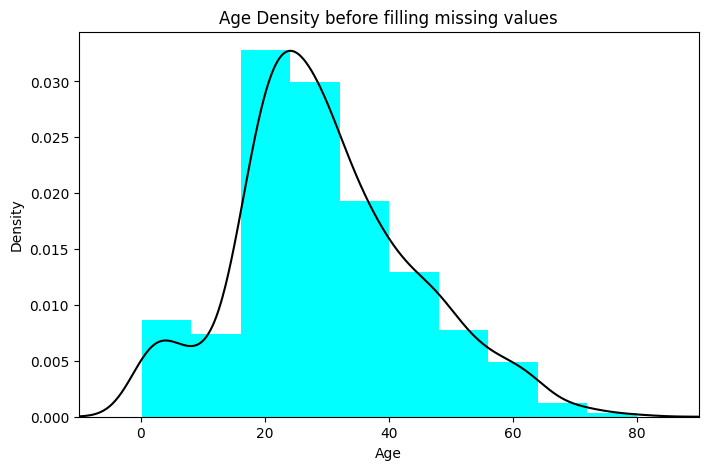

In [15]:
## Histogram of Age
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(df['Age'], bins=10, density=True,stacked=False, color='cyan', alpha=1)
df["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.title('Age Density before filling missing values')
plt.xlim(-10,90)

plt.show()


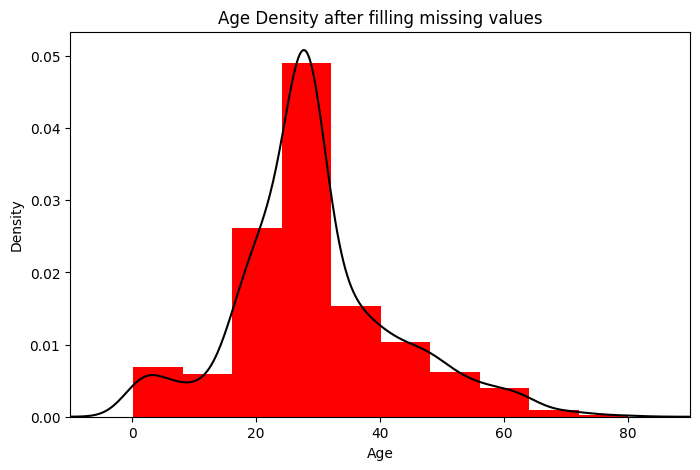

The mean of age was 29.5 and the median was 28.0


In [16]:
## As it seams to be right skewed, using the mean would potentially return biased results by filling in ages that are older than desired.plt
# I'll use the median instead to replace the missing values

df['Age'] = df['Age'].fillna(df['Age'].median())

fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(df['Age'], bins=10, density=True,stacked=True, color='red', alpha=1)
df["Age"].plot(kind='density', color='black')
ax.set(xlabel='Age')
plt.title('Age Density after filling missing values')

plt.xlim(-10,90)

plt.show()

print("The mean of age was {0} and the median was {1}".format(round(df['Age'].mean(skipna=True),2),df['Age'].median(skipna=True)))

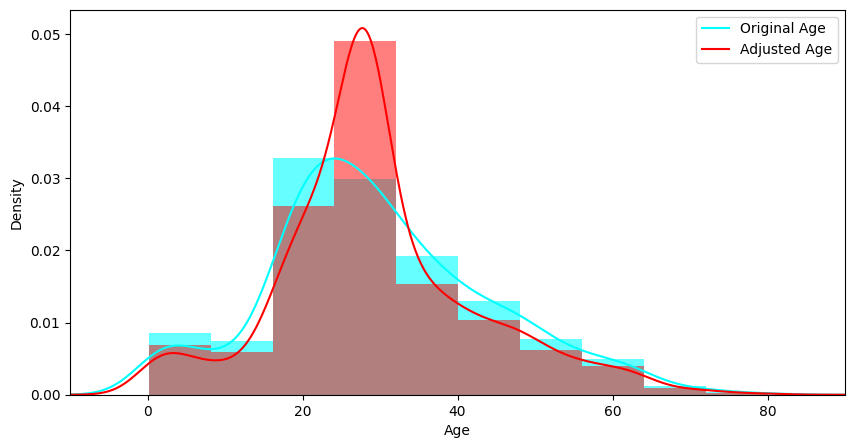

In [17]:
## Differencies in Age: Before vs After

plt.figure(figsize=(10,5))
ax = df_copy["Age"].hist(bins=10, density=True, stacked=True, color='cyan', alpha=0.6)
df_copy["Age"].plot(kind='density', color='cyan')
ax = df["Age"].hist(bins=10, density=True, stacked=True, color='red', alpha=0.5)
df["Age"].plot(kind='density', color='red')
ax.legend(['Original Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

## EMBARKED ##

In [18]:
## I want to figure out what the most common type of Embark is
pd.DataFrame(df['Embarked'].value_counts())

,Embarked
S,914
C,270
Q,123


<AxesSubplot: title={'center': 'Embarkation count'}, xlabel='Embarked', ylabel='count'>

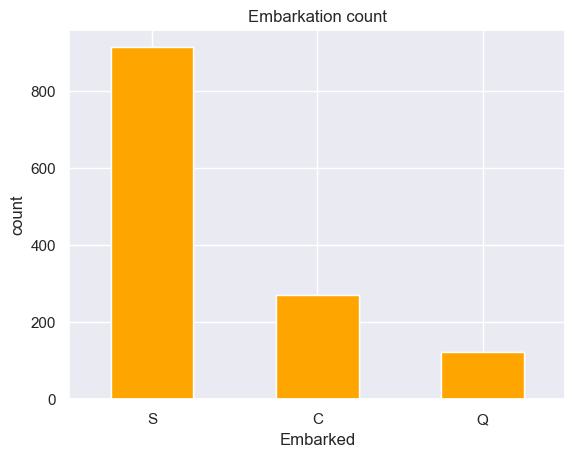

In [19]:
## now, I want to plot the most common type of Embark
sns.set(font_scale=1)
df['Embarked'].value_counts().plot(kind='bar', xlabel = 'Embarked', ylabel='count', rot=0, title= 'Embarkation count')
df['Embarked'].value_counts().plot.bar(color = 'orange', rot = 0)


In [20]:
# I want now to replace the nulls values with the most popular type of Embarkation: S
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())


## CABIN ## 

In [21]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
## As this column has too many different types of values and many NULLS, as well as not adding important information, I'll drop this column
df.drop('Cabin', axis=1, inplace=True)

## FARE ##

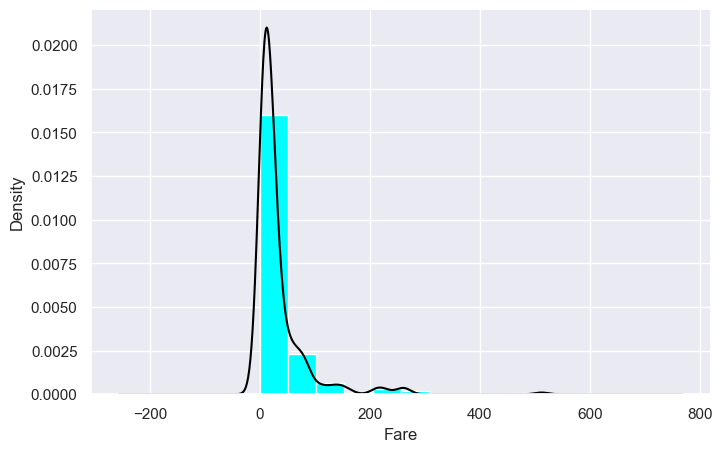

In [23]:
## Histogram of Fare
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(df['Fare'], bins=10, density=True,stacked=True, color='cyan', alpha=1)
df["Fare"].plot(kind='density', color='black')
ax.set(xlabel='Fare')

plt.show()

In [24]:
# Replacing the nulls values with the median of Fare, as it's skewed to the right
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# FEATURE WRANGLING #

## SibSp & Parch ##

In [26]:
## Replacing Siblingspouses and ParentChild columns for TravelAlone - the original features don't add much value as well as I can reduce dimensionality
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [27]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,0


## Sex & Embarked ##

In [28]:
## I want to see the unique categories of Sex
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [29]:
## Encoding the Sex ans Embarked column - using dummy encoding
df = pd.get_dummies(df,
                         prefix={'Sex':'Sex'},
                         columns=["Sex"],
                         drop_first=True)

df = pd.get_dummies(df,
                         prefix={'Embarked':'Embarked'},
                         columns=["Embarked"],
                         drop_first=False) # One Hot Encoder
df.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,1,1,0,0,1


## NAME & TICKET ##

In [30]:
# Dropping both columns out
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,71.2833,0,0,1,0,0
2,3,1,3,26.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,53.1000,0,0,0,0,1
4,5,0,3,35.0,8.0500,1,1,0,0,1


## AGE & FARE ##

In [32]:
## Need to know the min and max of Fare
print("Fare Min:", df['Fare'].min())
print("Fare Max:", df['Fare'].max())

Fare Min: 0.0
Fare Max: 512.3292


In [33]:
## I want to create categorical variables from Age & Fare (bounds)
# 0-25 = young
# 26-50 = middle age
# +51 = elderly

# 0-175 = Cheap
# 176-350 = Middle
# +350 = Expensive
df['Age_bins'] = np.where((df["Age"])<26, "young", np.where((df["Age"])>50,"elderly","middle age"))
df['Fare_bins'] = np.where((df["Fare"])<176, "Cheap", np.where((df["Fare"])>350,"Expensive","Middle"))

In [34]:
## Checking if the above worked
t = df.groupby(['Fare_bins']).count().sort_values('Fare',ascending=False)
print(t)
p = df.groupby(['Age_bins']).count().sort_values('Age',ascending=False)
p


           PassengerId  Survived  Pclass   Age  Fare  TravelAlone  Sex_male  \
Fare_bins                                                                     
Cheap             1271      1271    1271  1271  1271         1271      1271   
Middle              34        34      34    34    34           34        34   
Expensive            4         4       4     4     4            4         4   

           Embarked_C  Embarked_Q  Embarked_S  Age_bins  
Fare_bins                                                
Cheap            1271        1271        1271      1271  
Middle             34          34          34        34  
Expensive           4           4           4         4  


,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_bins
Age_bins,,,,,,,,,,,
middle age,771,771,771,771,771,771,771,771,771,771,771
young,443,443,443,443,443,443,443,443,443,443,443
elderly,95,95,95,95,95,95,95,95,95,95,95


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   TravelAlone  1309 non-null   int32  
 6   Sex_male     1309 non-null   uint8  
 7   Embarked_C   1309 non-null   uint8  
 8   Embarked_Q   1309 non-null   uint8  
 9   Embarked_S   1309 non-null   uint8  
 10  Age_bins     1309 non-null   object 
 11  Fare_bins    1309 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(2), uint8(4)
memory usage: 92.0+ KB


# EXPLORATORY ANALYSIS #

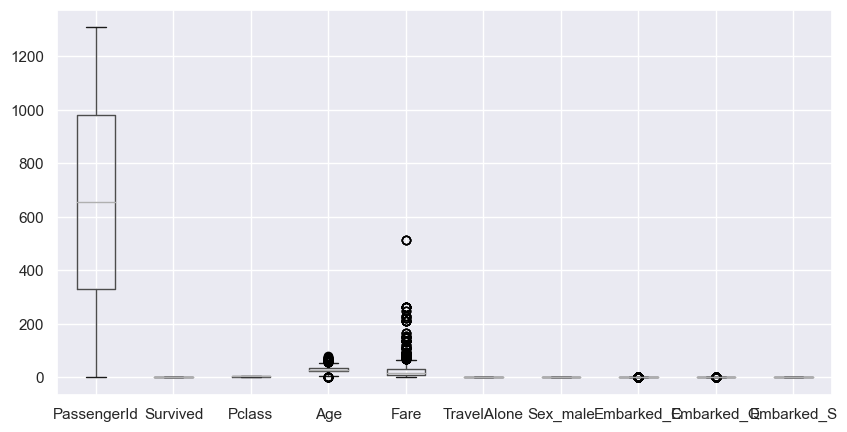

In [36]:
## Outliers
df.boxplot(figsize=(10,5))
plt.show()

### I am not removing outliers because it gets rid of almost 50% of the data ###

In [37]:
## Correlation Matrix
corr_mat = df.corr(numeric_only=True)
corr_mat

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.020370,-0.038354,0.025799,0.031128,0.028546,0.013406,0.048101,0.011585,-0.049836
Survived,-0.020370,1.000000,-0.264710,-0.043286,0.233773,-0.216299,-0.688371,0.121156,0.040950,-0.133020
Pclass,-0.038354,-0.264710,1.000000,-0.377908,-0.558683,0.147393,0.124617,-0.269658,0.230491,0.091320
Age,0.025799,-0.043286,-0.377908,1.000000,0.178182,0.107076,0.053663,0.075016,-0.031132,-0.046404
Fare,0.031128,0.233773,-0.558683,0.178182,1.000000,-0.275037,-0.185681,0.286368,-0.129958,-0.170068
TravelAlone,0.028546,-0.216299,0.147393,0.107076,-0.275037,1.000000,0.284537,-0.107874,0.127214,0.014246
Sex_male,0.013406,-0.688371,0.124617,0.053663,-0.185681,0.284537,1.000000,-0.066564,-0.088651,0.115193
Embarked_C,0.048101,0.121156,-0.269658,0.075016,0.286368,-0.107874,-0.066564,1.000000,-0.164166,-0.778262
Embarked_Q,0.011585,0.040950,0.230491,-0.031132,-0.129958,0.127214,-0.088651,-0.164166,1.000000,-0.491656
Embarked_S,-0.049836,-0.133020,0.091320,-0.046404,-0.170068,0.014246,0.115193,-0.778262,-0.491656,1.000000


<AxesSubplot: >

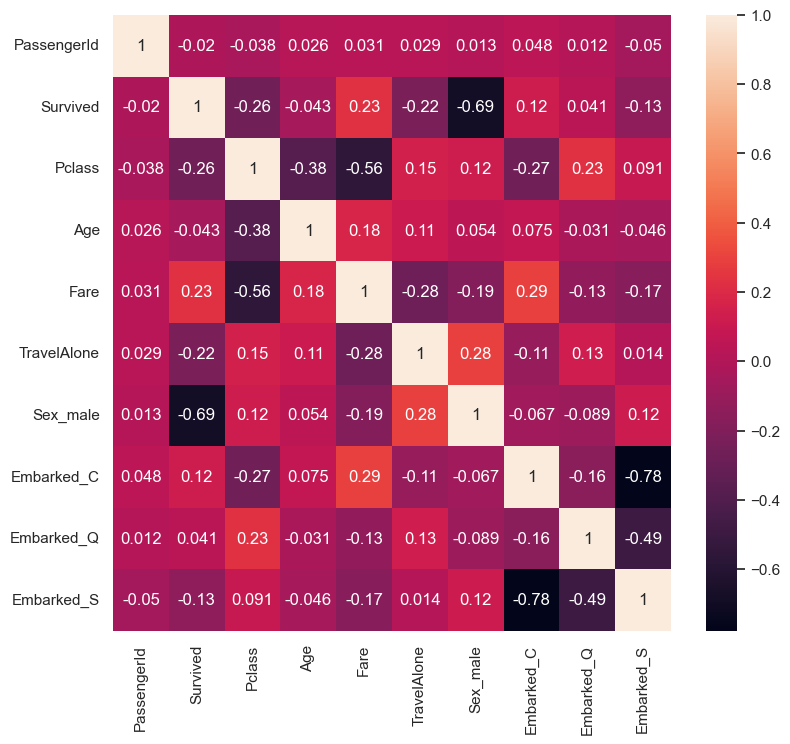

In [38]:
## Heatmap
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_mat, annot=True)

## Feature Relationships ##

In [39]:
## I want to see the proportion of classes
x = df.groupby(['Pclass'])['PassengerId'].count().to_frame('count').reset_index()

<AxesSubplot: ylabel='count'>

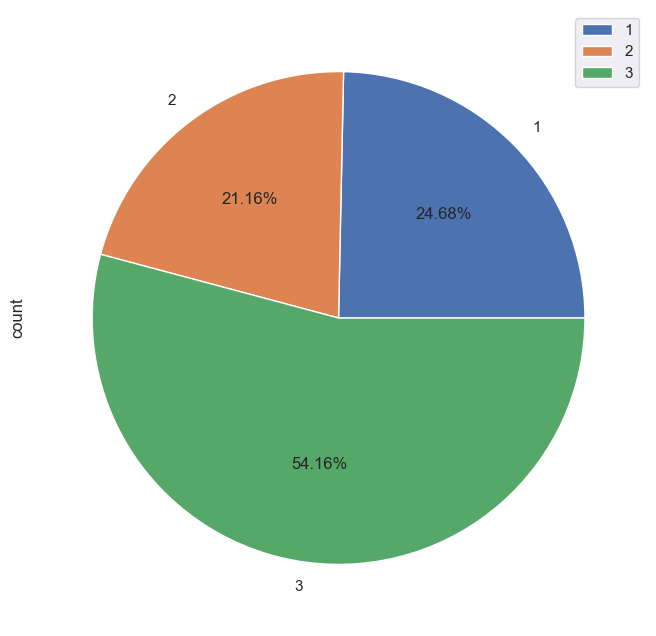

In [40]:
x = df.groupby(['Pclass'])['PassengerId'].count().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize = (10,8))
x.plot(kind = 'pie', y = 'count', labels = x['Pclass'], autopct = '%1.2f%%', ax=ax)

In [41]:
Fare_Class = df.groupby(['Fare_bins','Pclass'])['PassengerId'].count().to_frame('count').reset_index()
Fare_Class

,Fare_bins,Pclass,count
0,Cheap,1,285
1,Cheap,2,277
2,Cheap,3,709
3,Expensive,1,4
4,Middle,1,34


Text(0.5, 1.0, 'Fare_bins barplot for Class on Titanic')

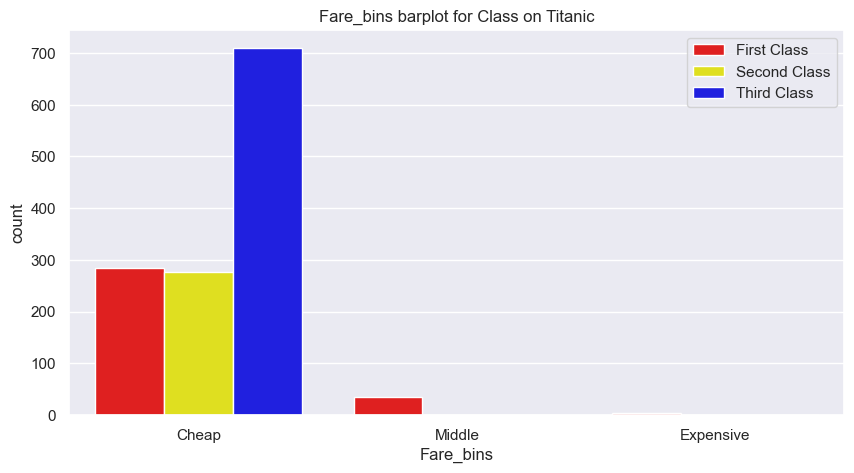

In [42]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x=df["Fare_bins"],hue="Pclass",palette=["red","yellow","blue"])
plt.legend(['First Class', 'Second Class','Third Class'])
plt.title('Fare_bins barplot for Class on Titanic')

In [43]:
e = df.groupby(['Age_bins'])['PassengerId'].count().to_frame('count').reset_index()
e

,Age_bins,count
0,elderly,95
1,middle age,771
2,young,443


<AxesSubplot: ylabel='count'>

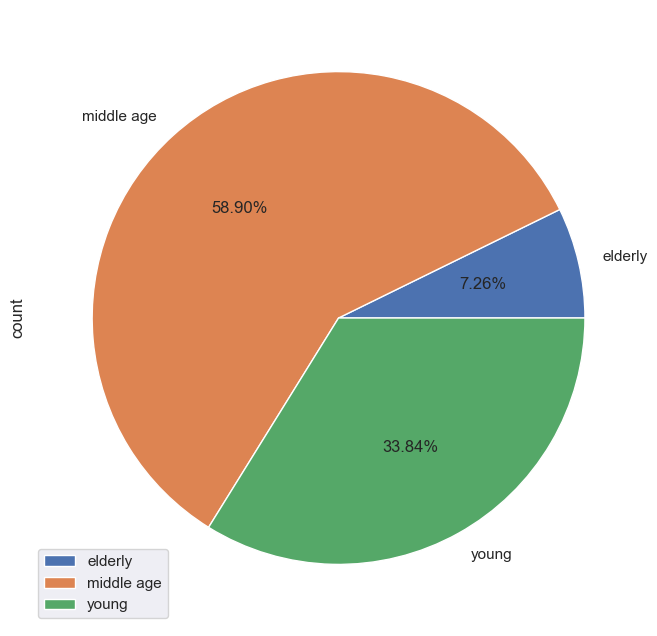

In [44]:

fig, ax = plt.subplots(figsize = (10,8))
e.plot(kind = 'pie', y = 'count', labels = e['Age_bins'], autopct = '%1.2f%%', ax=ax)

Text(0.5, 1.0, 'Age_bins barplot for Population Survived and Died on Titanic')

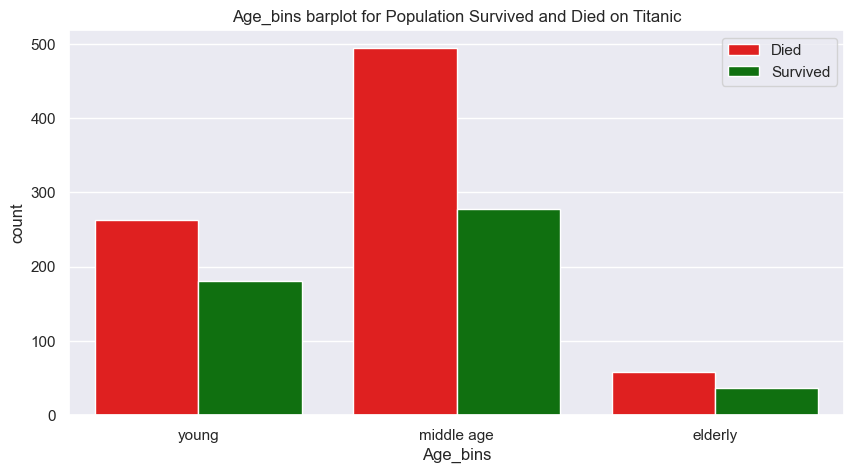

In [45]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x=df["Age_bins"],hue="Survived",palette=["red","green"])
plt.legend(['Died', 'Survived'])
plt.title('Age_bins barplot for Population Survived and Died on Titanic')

Despite the fact that middle age category has more people who survived the catastrophe comparet to the other 2 age categories, this group also had the biggest amount of dead people, which led to be the group with the worst Survival rate, which we can see below.

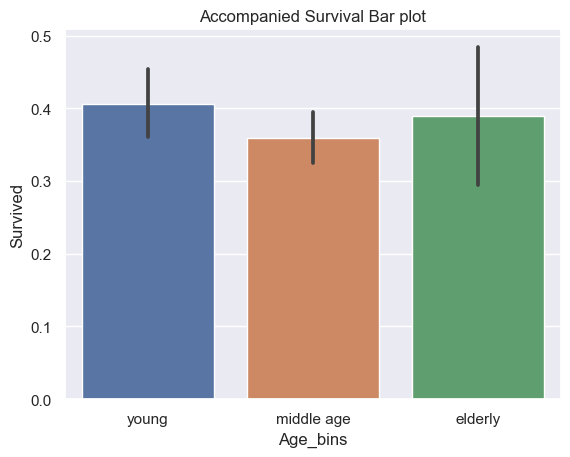

In [46]:
## Class Survived
sns.barplot(x='Age_bins', y='Survived', data=df)
plt.title('Accompanied Survival Bar plot')
plt.show()


In [47]:
df.groupby(['TravelAlone','Survived'])['PassengerId'].count().to_frame('count').reset_index()

,TravelAlone,Survived,count
0,0,0,256
1,0,1,263
2,1,0,559
3,1,1,231


In [48]:
## Creating categorical groups for TravelAlone
df['TravelAlone2']=np.where((df["TravelAlone"])==1, "Alone", "Accompanied") 
df.head(10)

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_bins,Fare_bins,TravelAlone2
0,1,0,3,22.0,7.2500,0,1,0,0,1,young,Cheap,Accompanied
1,2,1,1,38.0,71.2833,0,0,1,0,0,middle age,Cheap,Accompanied
2,3,1,3,26.0,7.9250,1,0,0,0,1,middle age,Cheap,Alone
3,4,1,1,35.0,53.1000,0,0,0,0,1,middle age,Cheap,Accompanied
4,5,0,3,35.0,8.0500,1,1,0,0,1,middle age,Cheap,Alone
5,6,0,3,28.0,8.4583,1,1,0,1,0,middle age,Cheap,Alone
6,7,0,1,54.0,51.8625,1,1,0,0,1,elderly,Cheap,Alone
7,8,0,3,2.0,21.0750,0,1,0,0,1,young,Cheap,Accompanied
8,9,1,3,27.0,11.1333,0,0,0,0,1,middle age,Cheap,Accompanied
9,10,1,2,14.0,30.0708,0,0,1,0,0,young,Cheap,Accompanied


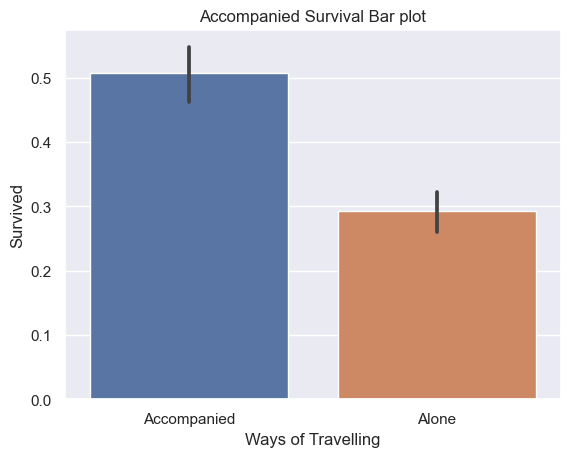

In [49]:
## Class Survived
sns.barplot(x='TravelAlone2', y='Survived', data=df)
plt.title('Accompanied Survival Bar plot')
plt.xlabel('Ways of Travelling')
plt.show()


Text(0.5, 1.0, 'Ways of travelling barplot for Sex on Titanic')

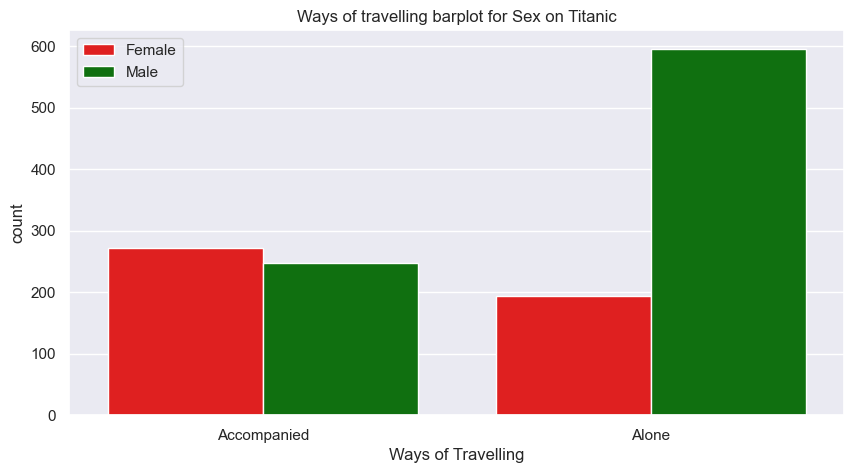

In [50]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x=df["TravelAlone2"],hue="Sex_male",palette=["red","green"])
plt.legend(['Female', 'Male'])
plt.xlabel('Ways of Travelling')
plt.title('Ways of travelling barplot for Sex on Titanic')

Text(0.5, 1.0, 'Class barplot for Population Survived and Died on Titanic')

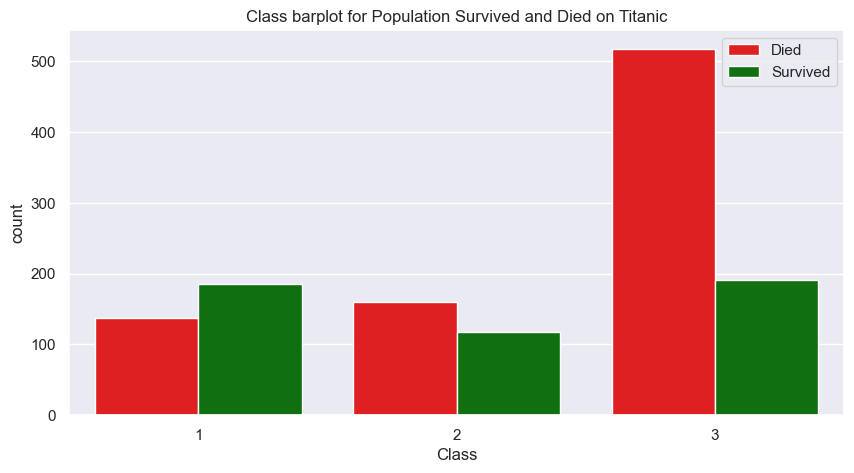

In [51]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x=df["Pclass"],hue="Survived",palette=["red","green"])
plt.legend(['Died', 'Survived'])
plt.xlabel('Class')
plt.title('Class barplot for Population Survived and Died on Titanic')

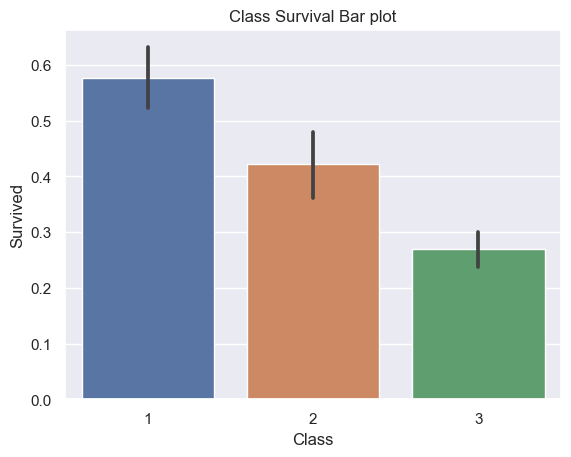

In [52]:
## Class Survived
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Class Survival Bar plot')
plt.xlabel('Class')

plt.show()


Text(0.5, 1.0, 'Class barplot for Population Survived and Died on Titanic')

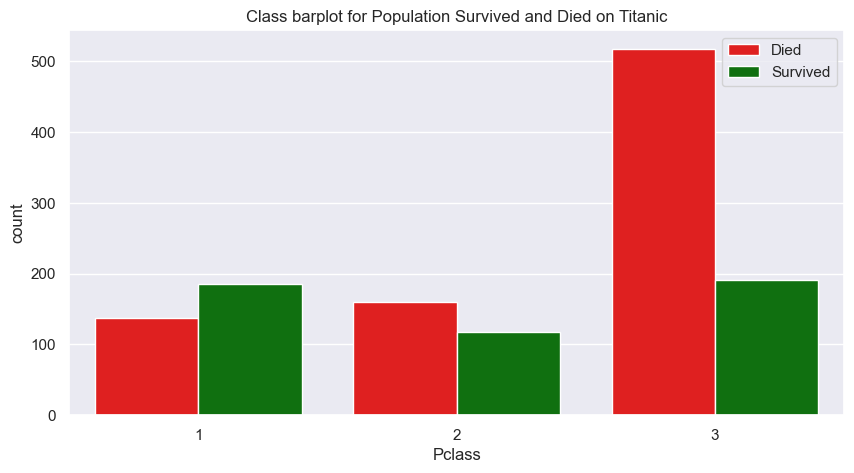

In [53]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x=df["Pclass"],hue="Survived",palette=["red","green"])
plt.legend(['Died', 'Survived'])
plt.title('Class barplot for Population Survived and Died on Titanic')

In [54]:
df_copy.groupby(['Embarked','Survived'])['PassengerId'].count().to_frame('count').reset_index()

,Embarked,Survived,count
0,C,0,137
1,C,1,133
2,Q,0,69
3,Q,1,54
4,S,0,609
5,S,1,305


Text(0.5, 1.0, 'Embarked barplot for Population Survived and Died on Titanic')

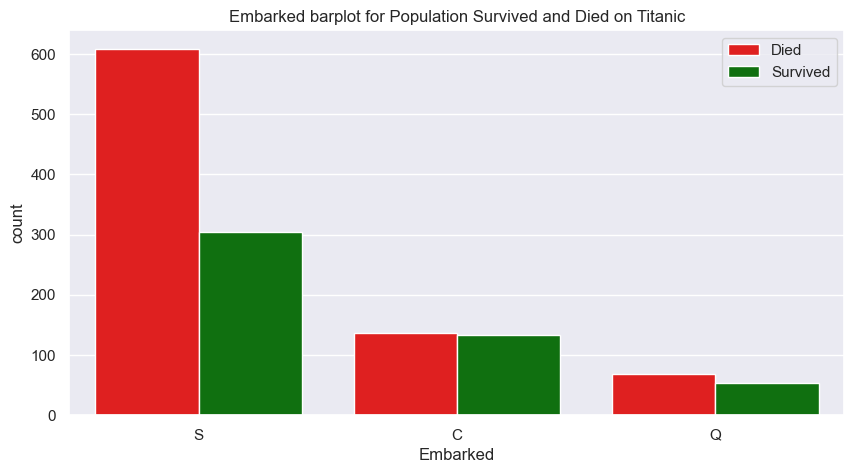

In [55]:
ax = plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_copy, x=df_copy["Embarked"],hue="Survived",palette=["red","green"])
plt.legend(['Died', 'Survived'])
plt.title('Embarked barplot for Population Survived and Died on Titanic')

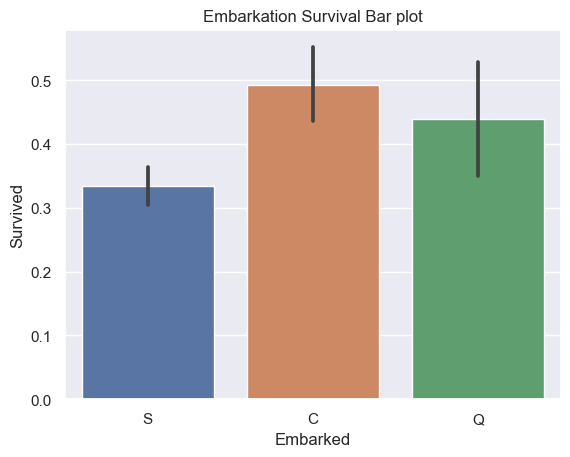

In [56]:
## Embarkation Survived
sns.barplot(x='Embarked', y='Survived', data=df_copy)
plt.title('Embarkation Survival Bar plot')

plt.show()


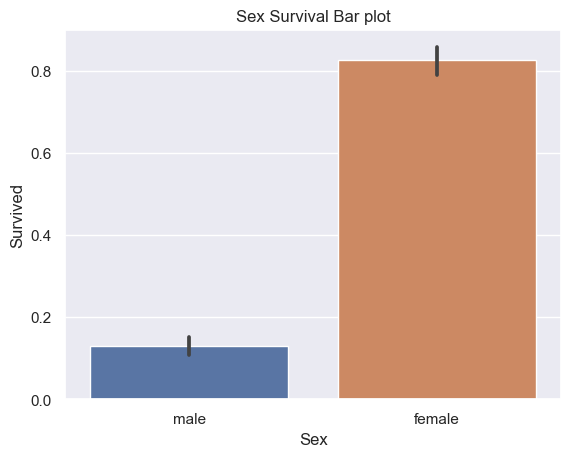

In [85]:
## Gender
## Embarkation Survived
sns.barplot(x='Sex', y='Survived', data=df_copy)
plt.title('Sex Survival Bar plot')
plt.show()


# ML Classifier Algorithm #

In [58]:
df

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_bins,Fare_bins,TravelAlone2
0,1,0,3,22.0,7.2500,0,1,0,0,1,young,Cheap,Accompanied
1,2,1,1,38.0,71.2833,0,0,1,0,0,middle age,Cheap,Accompanied
2,3,1,3,26.0,7.9250,1,0,0,0,1,middle age,Cheap,Alone
3,4,1,1,35.0,53.1000,0,0,0,0,1,middle age,Cheap,Accompanied
4,5,0,3,35.0,8.0500,1,1,0,0,1,middle age,Cheap,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,28.0,8.0500,1,1,0,0,1,middle age,Cheap,Alone
414,1306,1,1,39.0,108.9000,1,0,1,0,0,middle age,Cheap,Alone
415,1307,0,3,38.5,7.2500,1,1,0,0,1,middle age,Cheap,Alone
416,1308,0,3,28.0,8.0500,1,1,0,0,1,middle age,Cheap,Alone


In [59]:
X = df.iloc[:, [2,3,4,5,6,7,8,9]].values  ## Just taking the numerical variables
y = df.iloc[:, 1].values

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [61]:
## Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train

array([[ 0.83627021,  0.19232492, -0.4860538 , ..., -0.50536688,
        -0.3231569 ,  0.65152881],
       [ 0.83627021, -1.78396509, -0.3407943 , ...,  1.97876046,
        -0.3231569 , -1.53485153],
       [-0.36644258,  0.03422172, -0.39802457, ..., -0.50536688,
         3.0944721 , -1.53485153],
       ...,
       [-1.56915537, -0.51913949,  4.55562098, ..., -0.50536688,
        -0.3231569 ,  0.65152881],
       [ 0.83627021,  1.37809893, -0.50375768, ..., -0.50536688,
        -0.3231569 ,  0.65152881],
       [ 0.83627021, -0.12388148, -0.48918232, ..., -0.50536688,
         3.0944721 , -1.53485153]])

## Logistic Regression ##

In [63]:
## Train the logistic Regression
model_LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
model_LR.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [64]:
# Make the Prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
257,0,0
258,0,0
259,1,1
260,1,1


In [65]:
# Evaluate the model accuracy
accuracy_LR = accuracy_score(Y_test, pred_LR)

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, pred_LR)

print('Accuracy:', round(accuracy_LR, 3), '\n')
print("Confusion Matrix:\n", conf_mat)


Accuracy: 0.859 

Confusion Matrix:
 [[143  13]
 [ 24  82]]


## Naive Bayes ##

In [66]:
##### Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [67]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
257,0,0
258,0,0
259,1,1
260,1,1


In [68]:
# Evaluate the model accuracy
accuracy_NB = accuracy_score(Y_test, y_pred_NB)

# Confusion Matrix
conf_mat_NB = confusion_matrix(Y_test, y_pred_NB)

print('Accuracy:', round(accuracy_NB,3), '\n')
print("Confusion Matrix: \n",conf_mat_NB)

Accuracy: 0.832 

Confusion Matrix: 
 [[132  24]
 [ 20  86]]


## K-Nearest Neighbor ##

In [69]:
### K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#train and test
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [70]:
## Make Prediction
y_pred_knn = knn_model.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,1
4,0,1
...,...,...
257,0,0
258,0,0
259,1,1
260,1,1


In [71]:
# Evaluate the model accuracy
accuracy_knn = accuracy_score(Y_test, y_pred_knn)

# Confusion Matrix
conf_mat_knn = confusion_matrix(Y_test, y_pred_knn)

print('Accuracy:', round(accuracy_knn,3), '\n')
print("Confusion Matrix: \n",conf_mat_knn)

Accuracy: 0.851 

Confusion Matrix: 
 [[138  18]
 [ 21  85]]


## Decision Tree Classifier ##

In [72]:
## Decision Tree Classifier
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5) ## many parameter e.g. min_samples_leaf would be optional
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=3, min_samples_leaf=5)
decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [73]:
# training my models

# Fit the trees
decision_tree_gini.fit(X_train,Y_train)
decision_tree_entropy.fit(X_train,Y_train)
decision_tree_max_depth.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [74]:
# Make prediction
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_max_depth.predict(X_test)

In [75]:
# Evaluate the gini
accuracy_gini = accuracy_score(Y_test, y_pred_gini)

# Confusion Matrix
conf_mat_gini = confusion_matrix(Y_test, y_pred_gini)

print('Accuracy gini:', round(accuracy_gini,3), '\n')
print("Confusion Matrix: \n",conf_mat_gini)

Accuracy gini: 0.863 

Confusion Matrix: 
 [[143  13]
 [ 23  83]]


In [76]:
# Evaluate the entropy
accuracy_entropy = accuracy_score(Y_test, y_pred_entropy)

# Confusion Matrix
conf_mat_entropy = confusion_matrix(Y_test, y_pred_entropy)

print('Accuracy: entropy', round(accuracy_entropy,3), '\n')
print("Confusion Matrix: \n",conf_mat_entropy)

Accuracy: entropy 0.855 

Confusion Matrix: 
 [[144  12]
 [ 26  80]]


In [77]:
# Evaluate the max_depth
accuracy_depth = accuracy_score(Y_test, y_pred_depth)

# Confusion Matrix
conf_mat_depth = confusion_matrix(Y_test, y_pred_depth)

print('Accuracy max depth', round(accuracy_depth,3), '\n')
print("Confusion Matrix: \n",conf_mat_depth)

Accuracy max depth 0.863 

Confusion Matrix: 
 [[143  13]
 [ 23  83]]


## Support Vector Machine (SVM) ##

In [78]:
###### SVM
clfLinear = svm.SVC(kernel='linear') # Linear Kernel
clfSigmoid = svm.SVC(kernel='sigmoid') # Sigmoid
clfRVF = svm.SVC(kernel='rbf')# RBF 


In [79]:
clfLinear.fit(X_train, Y_train)
clfSigmoid.fit(X_train, Y_train)
clfRVF.fit(X_train, Y_train)

SVC()

In [80]:
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfSigmoid.predict(X_test)
y_pred_RVF = clfRVF.predict(X_test)

In [81]:

print("Accuracy Linear:",round(metrics.accuracy_score(Y_test, y_pred_linear),3))
print("Accuracy Sigmoid:",round(metrics.accuracy_score(Y_test, y_pred_sigmoid),3))
print("Accuracy RBF:",round(metrics.accuracy_score(Y_test, y_pred_RVF),3))

Accuracy Linear: 0.863
Accuracy Sigmoid: 0.779
Accuracy RBF: 0.863
